In [2]:
import numpy as np
import matplotlib.pyplot as plt

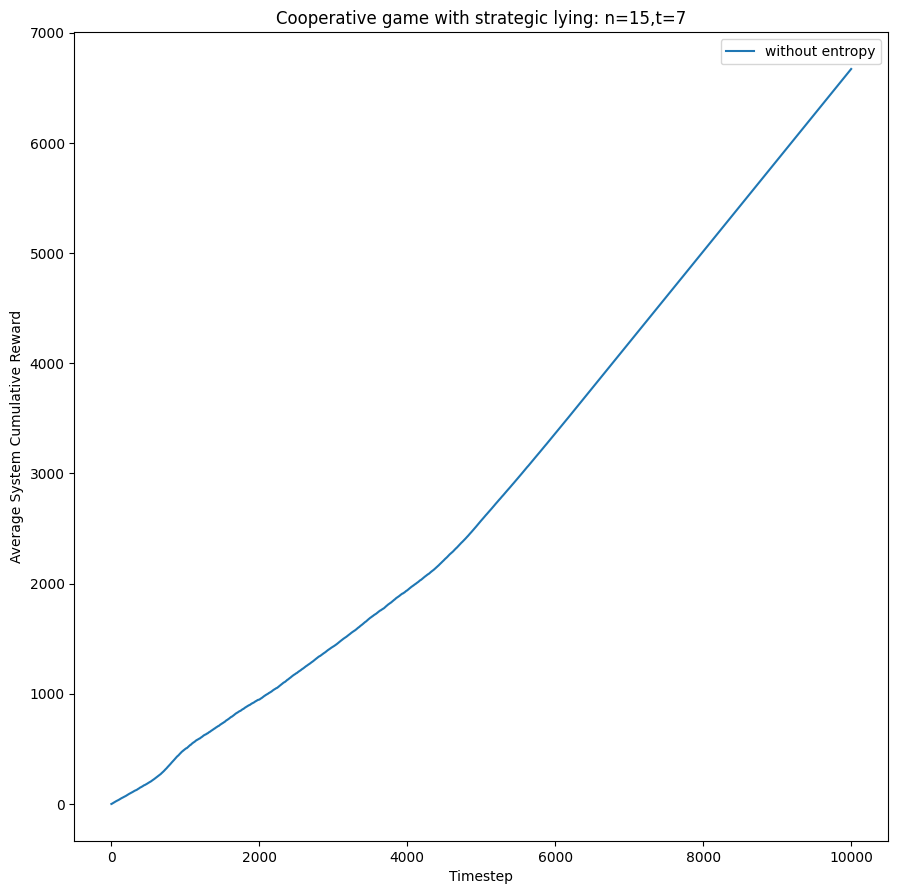

In [4]:
n = 15
t = 7

# load simulation results
cum_rew_1 = np.load(f'data/base/n{n}t{t}_cum_rew_cnf0.npy')
#cum_rew_2 = np.load(f'data/base_ent/n{n}t{t}_cum_rew_cnf0.npy')
# average over the simulations
cum_rew_1 = np.mean(cum_rew_1, axis=0)
#cum_rew_2 = np.mean(cum_rew_2, axis=0)
# plot cum rew graphs
plt.title(f'Cooperative game with strategic lying: n={n},t={t}')
plt.xlabel('Timestep')
plt.ylabel('Average System Cumulative Reward')

plt.plot(cum_rew_1, label='without entropy')
#plt.plot(cum_rew_2, label='with entropy')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)

In [7]:
struct_1 = np.load(f'data/base/n{n}t{t}_cstruct_cnf0.npy')

sets_list = [set([i+1 for i, val in enumerate(row) if val == 1]) for row in struct_1]
print(sets_list)

[set(), set(), set(), set(), set(), {1, 2, 7, 9, 15}, {3, 4, 5, 6, 8, 10, 11, 12, 13, 14}]
